# CPSC 330 hw8

## Instructions
rubric={points:5}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

## Dataset
rubric={points:5}

For this assignment, you can choose any reasonable dataset for supervised learning. Here is a list of Kaggle datasets in CSV format: https://www.kaggle.com/datasets?fileType=csv. You can also pick a dataset from your own hobby project or research project. 

If it's not already clear from the dataset, you will need to choose which column you are trying to predict. 

This week, you will build ML models on your dataset. Next week (hw9), you'll write a blog post about your work.

Your task here for these 5 points is to describe where you got the data from. If from Kaggle or another online source, poviding a link is sufficient. If from elsewhere, please elaborate.

## Exercise 1
rubric={points:10}

For your dataset: 

- Describe your goal (e.g. what you are trying to predict).
- Describe a (possibly fictional) scenario where someone in the real world is interested in this task and why it is useful to them. 
- What is the **decision** that ML is going to help make and what are the alternatives?

Max 1 paragraph total.

Answer: My goal is predict good selling books. The scenario is useful for the managers of bookstore because the numeric features (such as user ratings, the number of reviews, and the price) can help predict which books will be popular. ML is going to help make the decision of which books will be popular to help the managers know that which books should be purchased more. The alternatives is which books will be sold more. 

## Exercise 2

Build a model for your chosen problem. Your work must involve the following elements (the list is broken up between the sub-parts):

- Split your data into train/test

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
df = pd.read_csv("bestsellers with categories.csv")
df_train, df_test = train_test_split(df, random_state=123)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


#### 2(a)
rubric={points:10}

- Perform exploratory data analysis, including outlier detection. 

In [2]:
df["User Rating"].value_counts()

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: User Rating, dtype: int64

Text(0, 0.5, 'Reviews')

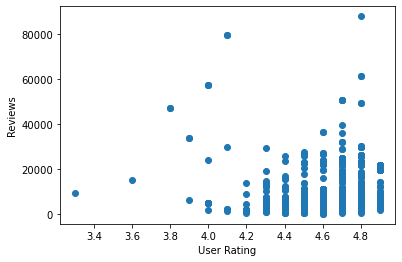

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['User Rating'], df['Reviews'])
plt.xlabel('User Rating')
plt.ylabel('Reviews')

Text(0, 0.5, 'Reviews')

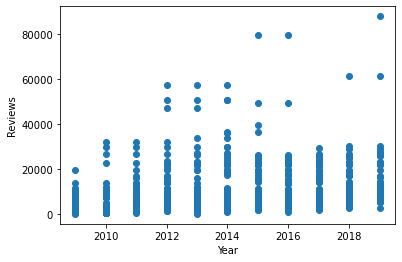

In [4]:
plt.scatter(df['Year'], df['Reviews'])
plt.xlabel('Year')
plt.ylabel('Reviews')

Text(0, 0.5, 'User Rating')

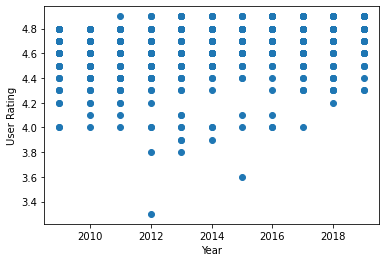

In [5]:
plt.scatter(df['Year'], df['User Rating'])
plt.xlabel('Year')
plt.ylabel('User Rating')

In [6]:
print("Analysis: \n User Rating - Reviews: For most books, books with higher ratings have higher number of reviews. Only a few books with low ratings have higher number of reviews. \n")
print("Year-Reviews: For most books, average books have nearly same number of reviews. The books with outstanding have a higher number of reviews as time goes by \n")
print("Year-User Rating: For most books, the user ratings gather between 4.0 and 5.0. ")

Analysis: 
 User Rating - Reviews: For most books, books with higher ratings have higher number of reviews. Only a few books with low ratings have higher number of reviews. 

Year-Reviews: For most books, average books have nearly same number of reviews. The books with outstanding have a higher number of reviews as time goes by 

Year-User Rating: For most books, the user ratings gather between 4.0 and 5.0. 


#### 2(b)
rubric={points:5}

- Drop features that would not actually be available during deployment.
- Drop features for other reasons, e.g. they would not be useful for predicting the target.
- Provide a brief justification explaining the features you dropped.

In [7]:
df_b = df.drop(columns = "Name")

In [8]:
df_bb = df_b.drop(columns = "Author")
df_bb

,User Rating,Reviews,Price,Year,Genre
0,4.7,17350,8,2016,Non Fiction
1,4.6,2052,22,2011,Fiction
2,4.7,18979,15,2018,Non Fiction
3,4.7,21424,6,2017,Fiction
4,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...
545,4.9,9413,8,2019,Fiction
546,4.7,14331,8,2016,Non Fiction
547,4.7,14331,8,2017,Non Fiction
548,4.7,14331,8,2018,Non Fiction


In [9]:
print("Analysis: Drop Name and Author because they are not useful to predict the information of possible popular books in future")

Analysis: Drop Name and Author because they are not useful to predict the information of possible popular books in future


In [10]:
df["Year"].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

#### 2(c)
rubric={points:10}

- Build a preprocessing pipeline.

In [11]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, ARDRegression, Lasso, SGDRegressor, RidgeCV, LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import numpy as numpy

def preprocess_features(df_train, df_test, numeric_features, categorical_features, drop_features):

    all_features = set(numeric_features + categorical_features + drop_features)
    if set(df_train.columns) != all_features:
        print("Missing columns", set(df_train.columns) - all_features)
        print("Extra columns", all_features - set(df_train.columns))
        raise Exception("Columns do not match")
    
    numeric_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])  
    categorical_transformer = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='?')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer([
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])
    preprocessor.fit(df_train);

    ohe = preprocessor.named_transformers_['categorical'].named_steps['onehot']
    ohe_feature_names = list(ohe.get_feature_names(categorical_features))
    new_columns = numeric_features + ohe_feature_names

    X_train_enc = pd.DataFrame(preprocessor.transform(df_train).toarray(), index=df_train.index, columns=new_columns)
    X_test_enc  = pd.DataFrame(preprocessor.transform(df_test).toarray(),  index=df_test.index,  columns=new_columns)
    
    y_train = df_train["User Rating"]
    y_test  = df_test["User Rating"]
    
    return X_train_enc, y_train, X_test_enc, y_test, preprocessor

numeric_features = ['Reviews', 'Price', 'Year']
categorical_features = ['Genre', 'Name', 'Author']
drop_features = ['User Rating']

# split_year = 2017
# df_train = df[df["Year"] <= split_year]
# df_test  = df[df["Year"] >  split_year]
X_train_enc, y_train, X_test_enc, y_test, preprocessor = preprocess_features(df_train, df_test, 
        numeric_features, categorical_features, drop_features)

pipe_r = make_pipeline(preprocessor, Ridge())
pipe_r.fit(df_train, y_train)
ap = pipe_r.predict(df_test)
bp = y_test
r2_score(bp,ap)

0.39382696458636424

#### 2(d)
rubric={points:5}

- Try some models includng, at least:
    1. `DummyRegressor` or `DummyClassifer`, as appropriate
    2. `Ridge` or `LogisticRegression`, as appropriate
    3. `LGBMRegressor` or `LGBMClassifier`, as appropriate 


In [12]:
target_name = 'User Rating'
X_train = df_train.drop(columns=[target_name])
y_train = df_train[target_name]
X_test  = df_test.drop(columns=[target_name])
y_test  = df_test[target_name]
y_train = pd.DataFrame(y_train)
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Reviews', 'Price', 'Year']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='?',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Genre', 'Name', 'Author'])])

In [13]:
from sklearn.dummy import DummyRegressor
pipe_r = make_pipeline(preprocessor, DummyRegressor())
pipe_r.fit(df_train, y_train)
ap = pipe_r.predict(df_test)
bp = y_test
print("The score with DummyRegressor is " + str(r2_score(bp,ap)))

The score with DummyRegressor is -8.565702273255482e-06


In [14]:
pipe_r = make_pipeline(preprocessor, Ridge())
pipe_r.fit(df_train, y_train)
ap = pipe_r.predict(df_test)
bp = y_test
print("The score with Ridge is " + str(r2_score(bp,ap)))

The score with Ridge is 0.39382696458636424


In [15]:
from lightgbm import LGBMRegressor
pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor())
pipe_lgbm.fit(df_train, y_train)
ap = pipe_lgbm.predict(df_test)
bp = y_test
print("The score with LGBMRegressor is " + str(r2_score(bp,ap)))

The score with LGBMRegressor is 0.2522812779578879


/Users/yuanou/opt/anaconda3/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "
/Users/yuanou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### 2(e)
rubric={points:5}

- Hyperparameter tuning.

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer

numeric_features = ['Reviews', 'Price', 'Year']
categorical_features = ['Genre', 'Name', 'Author']
preprocessor_text = ColumnTransformer([
    ('scale',  StandardScaler(), numeric_features),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('text', CountVectorizer(max_features=100, stop_words='english'), "Name")
])

target_name = 'User Rating'
X_train = df_train.drop(columns=[target_name])
y_train = df_train[target_name]
X_test  = df_test.drop(columns=[target_name])
y_test  = df_test[target_name]
y_train = pd.DataFrame(y_train)

preprocessor_text.fit(X_train);
pipe_lgbm = make_pipeline(preprocessor_text, LGBMRegressor())

param_grid = {
    "lgbmregressor__num_leaves" : [11, 31, 51],
    "columntransformer__text__max_features" : [10, 100, 1000]
}

grid_search = GridSearchCV(pipe_lgbm, param_grid, return_train_score=True, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train);
grid_search.score(X_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  37 out of  45 | elapsed:    2.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.2s finished
/Users/yuanou/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.22800480455769379

#### 2(f)
rubric={points:5}

- Look at the sub-scores from the different folds of cross-validation and briefly discuss.


In [17]:
dr = DummyRegressor()

target_name = 'User Rating'
X_train = df_train.drop(columns=[target_name])
y_train = df_train[target_name]
X_test  = df_test.drop(columns=[target_name])
y_test  = df_test[target_name]
y_train = y_train.fillna(value=0)
y_test  = y_test.fillna(value=0)
dr.fit(X_train, y_train)

print("The scores for DummyRegressor ")
pd.DataFrame(cross_validate(dr, X_train, y_train, return_train_score=True)).mean()

The scores for DummyRegressor 


fit_time       0.001306
score_time     0.000445
test_score    -0.012628
train_score    0.000000
dtype: float64

In [18]:
preprocessor = ColumnTransformer([
    ('scale',  StandardScaler(), numeric_features),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

target_name = 'User Rating'
X_train = df_train.drop(columns=[target_name])
y_train = df_train[target_name]
X_test  = df_test.drop(columns=[target_name])
y_test  = df_test[target_name]
y_train = y_train.fillna(value=0)
y_test  = y_test.fillna(value=0)
preprocessor.fit(X_train)

lr = make_pipeline(preprocessor, Ridge())
lr.fit(X_train, y_train)
print("The scores for Ridge is ")
pd.DataFrame(cross_validate(lr, X_train, y_train, return_train_score=True)).mean()

The scores for Ridge is 


fit_time       0.012129
score_time     0.004924
test_score     0.502620
train_score    0.926576
dtype: float64

In [19]:
preprocessor = ColumnTransformer([
    ('scale',  StandardScaler(), numeric_features),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
preprocessor.fit(X_train)
lgbm = make_pipeline(preprocessor, LGBMRegressor())

target_name = 'User Rating'
X_train = df_train.drop(columns=[target_name])
y_train = df_train[target_name]
X_test  = df_test.drop(columns=[target_name])
y_test  = df_test[target_name]
y_train = y_train.fillna(value=0)
y_test  = y_test.fillna(value=0)

lgbm.fit(X_train, y_train)
print("The scores for LGBMRegressor is ")
pd.DataFrame(cross_validate(lgbm, X_train, y_train, return_train_score=True)).mean()

The scores for LGBMRegressor is 


fit_time       0.031646
score_time     0.005195
test_score     0.174785
train_score    0.657187
dtype: float64

In [20]:
print("Discussion: The scores for preprocessor with Ridge is more normal so I can know that the pipeline with Ridge fits better.")

Discussion: The scores for preprocessor with Ridge is more normal so I can know that the pipeline with Ridge fits better.


#### 2(g)
rubric={points:5}

- Compute at least one relevant scoring metric aside from the default `.score()` and briefly discussing the result.


In [21]:
dr = DummyRegressor()

target_name = 'User Rating'
X_train = df_train.drop(columns=[target_name])
y_train = df_train[target_name]
X_test  = df_test.drop(columns=[target_name])
y_test  = df_test[target_name]
y_train = y_train.fillna(value=0)
y_test  = y_test.fillna(value=0)

dr.fit(X_train, y_train)
print("The score for DummyRegressor " + str(dr.score(X_test, y_test)))

The score for DummyRegressor -8.565702273255482e-06


In [22]:
preprocessor = ColumnTransformer([
    ('scale',  StandardScaler(), numeric_features),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

target_name = 'User Rating'
X_train = df_train.drop(columns=[target_name])
y_train = df_train[target_name]
X_test  = df_test.drop(columns=[target_name])
y_test  = df_test[target_name]
y_train = y_train.fillna(value=0)
y_test  = y_test.fillna(value=0)
ytt = y_test.copy()

preprocessor.fit(X_train, y_train)
lr = make_pipeline(preprocessor, Ridge())
lr.fit(X_train, y_train)
print("The score for Ridge is " + str(lr.score(X_test, y_test)))

The score for Ridge is 0.39382696458636424


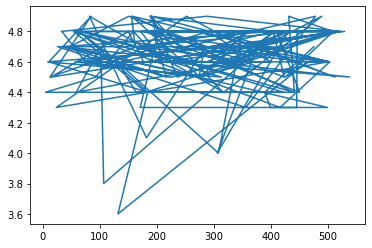

In [23]:
import matplotlib.pyplot as plt
plt.plot(y_test)

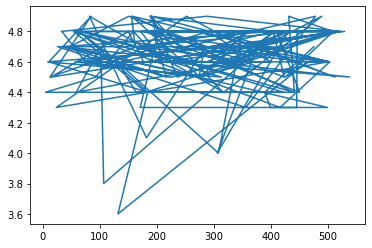

In [24]:
plt.plot(ytt)

In [25]:
preprocessor = ColumnTransformer([
    ('scale',  StandardScaler(), numeric_features),
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

preprocessor.fit(X_train, y_train)
lgbm = make_pipeline(preprocessor, LGBMRegressor())

target_name = 'User Rating'
X_train = df_train.drop(columns=[target_name])
y_train = df_train[target_name]
X_test  = df_test.drop(columns=[target_name])
y_test  = df_test[target_name]
y_train = y_train.fillna(value=0)
y_test  = y_test.fillna(value=0)

lgbm.fit(X_train, y_train)
print("The score for LGBMRegressor is " + str(lgbm.score(X_test, y_test)))

The score for LGBMRegressor is 0.2522812779578879


In [26]:
print("Discussion: The scores for pipeline with Ridge is better, and I can know that this model fits better.")

Discussion: The scores for pipeline with Ridge is better, and I can know that this model fits better.


#### 2(h)
rubric={points:5}

- Evaluate your model on the test set and briefly discuss your level of confidence in whether this is an accurate assessment of your model's future deployment performance.

In [27]:
print("Answer: From the result in the previous questions, I can know that the preprocessor with Ridge gets the highest score (0.39) among pipelines.")
print("The hyperparameter tuning gets lower score (0.22).")
print("But the score is not higher enough because it is far away from 0.7 or 0.8. Hence the level of confidence and the accuracy is low.")
print("Since pipeline with Ridge gets higheest score among all models, I will adjust this pipeline.")

Answer: From the result in the previous questions, I can know that the preprocessor with Ridge gets the highest score (0.39) among pipelines.
The hyperparameter tuning gets lower score (0.22).
But the score is not higher enough because it is far away from 0.7 or 0.8. Hence the level of confidence and the accuracy is low.
Since pipeline with Ridge gets higheest score among all models, I will adjust this pipeline.


## Exercise 3
rubric={points:10}

The following short-answer questions pertain to Lecture 19 on clustering.

1. What's the main difference between unsupervised and supervised learning?
2. When choosing $k$ in $k$-means, why not just choose the $k$ that leads to the smallest inertia (sum of squared distances within clusters)?
3. You decide to use clustering for _outlier detection_; that is, to detect instances that are very atypical compared to all the rest. How might you do this with $k$-means?
4. You decide to use clustering for _outlier detection_; that is, to detect instances that are very atypical compared to all the rest. How might you do this with DBSCAN?
5. For hierarchical clustering, we briefly discussed a few different methods for merging clusters: single linkage, average linkage, etc. Why do we have this added complication here - can't we just minimize distance like we did with $k$-means? 

Answer: 1, In unsupervised learning, we do not have labels telling is the "correct answer" for our recommendations. Supervised learning has such labels. 2, Sum of squared distances decreases as k increases. 3, Averaging the points to estimate cluster centres. 4, Keep the non-dense (right-hand) cluster together, and join the left two clusters. 5, Different methods are for different strategies. Single Linkage for minimum distance, complete linkage for maximum distance, average linkage for average distance.  

## Submission to Canvas

**IF YOU ARE WORKING WITH A PARTNER** please form the group before submitting - see instructions [here](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md#partners).

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Save your notebook.
3. Convert your notebook to `.html` format using the `convert_notebook()` function below **or** by `File -> Export Notebook As... -> Export Notebook to HTML`.
4. Run the code `submit()` below to go through an interactive submission process to Canvas.
>For this step, you will need a Canvas *Access Token* token. If you haven't already got one, log-in to Canvas, click `Account` (top-left of the screen), then `Settings`, then scroll down until you see the `+ New Access Token` button. Click that button, give your token any name you like and set the expiry date to Dec 31, 2020. Then click `Generate token`. Save this token in a safe place on your computer as you'll need it for all assignments. Treat the token with as much care as you would an important password. 

Note: for those having trouble with the Jupyter widgets and the dropdowns: if you add the argument `no_widgets=True` to your `submit` call, it should let you do a text-based entry of your key and avoid the dropdowns altogether. If this doesn't work, you probably need to upgrade to the latest version of `canvasutils` with `pip install canvasutils -U` from your terminal with your environment activated.


In [28]:
from canvasutils.submit import submit, convert_notebook

# Note: the canvasutils package should have been installed as part of your environment setup - 
# see https://github.com/UBC-CS/cpsc330/blob/master/docs/setup.md

ModuleNotFoundError: No module named 'canvasutils'

In [ ]:
# convert_notebook("hw8.ipynb", "html")  # uncomment and run when you want to try convert your notebook to HTML (or you can convert manually from the File menu)

In [ ]:
# submit(course_code=53561, token=False)  # uncomment and run when ready to submit 